## Appendix code: 100 points case

This is for appendix, so is not added into README.md. But the comments are given.

2-opt with 100 points


--- Performance Metrics ---
2-opt route: ['C3', 'J3', 'J10', 'I10', 'E8', 'D6', 'H4', 'B2', 'J4', 'G5', 'H5', 'G2', 'C9', 'H8', 'I8', 'E7', 'C1', 'I2', 'E2', 'I7', 'A10', 'F8', 'F2', 'B9', 'B8', 'F7', 'J7', 'B3', 'F4', 'F9', 'C7', 'I3', 'H3', 'F3', 'G10', 'G7', 'H1', 'F10', 'G3', 'J6', 'G9', 'J2', 'F5', 'G4', 'J5', 'G1', 'D10', 'G8', 'E10', 'I9', 'G6', 'B6', 'F1', 'D7', 'H10', 'I1', 'H6', 'H7', 'H9', 'I5', 'E3', 'A5', 'B4', 'J8', 'D9', 'C4', 'D2', 'J9', 'E9', 'A6', 'C10', 'H2', 'I4', 'E5', 'A7', 'B10', 'E1', 'B1', 'D4', 'A1', 'A8', 'A4', 'A9', 'D5', 'C8', 'J1', 'B5', 'C2', 'E6', 'F6', 'D8', 'D1', 'A3', 'I6', 'C6', 'D3', 'C5', 'E4', 'B7', 'A2']
2-opt cost: 189.3
2-opt run-time: 21.429944 seconds


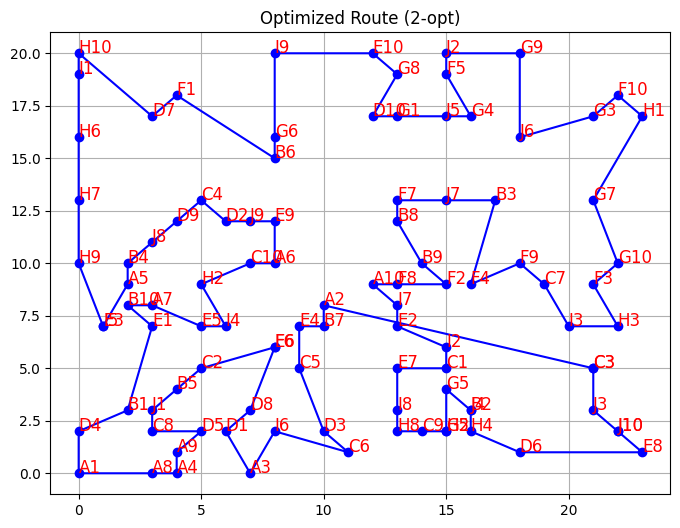

In [1]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import time
import math
import random

# Step 1: Cost function
def cost(route):
    total = 0
    for i in range(len(route) - 1):
        total += distances[(route[i], route[i+1])]
    return total

# Step 2: 2-opt function
def two_opt(route):
    best = route
    improved = True
    cost_history = [cost(best)] # Added for performance curve
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1:
                    continue
                new_route = route[:]
                new_route[i:j] = route[j - 1:i - 1:-1]
                if cost(new_route) < cost(best):
                    best = new_route
                    improved = True
                    cost_history.append(cost(best)) # Added for performance curve
        route = best
    return best, cost_history

# Step 3: Define city coordinates
city_coords = {
    'A1': (0, 0), 'A2': (10, 8), 'A3': (7, 0), 'A4': (4, 0), 'A5': (2, 9), 'A6': (8, 10), 'A7': (3, 8), 'A8': (3, 0), 'A9': (4, 1), 'A10': (12, 9),
    'B1': (2, 3), 'B2': (16, 3), 'B3': (17, 13), 'B4': (2, 10), 'B5': (4, 4), 'B6': (8, 15), 'B7': (10, 7), 'B8': (13, 12), 'B9': (14, 10), 'B10': (2, 8),
    'C1': (15, 5), 'C2': (5, 5), 'C3': (21, 5), 'C4': (5, 13), 'C5': (9, 5), 'C6': (11, 1), 'C7': (19, 9), 'C8': (3, 2), 'C9': (14, 2), 'C10': (7, 10),
    'D1': (6, 2), 'D2': (6, 12), 'D3': (10, 2), 'D4': (0, 2), 'D5': (5, 2), 'D6': (18, 1), 'D7': (3, 17), 'D8': (7, 3), 'D9': (4, 12), 'D10': (12, 17),
    'E1': (3, 7), 'E2': (13, 7), 'E3': (1, 7), 'E4': (9, 7), 'E5': (5, 7), 'E6': (8, 6), 'E7': (13, 5), 'E8': (23, 1), 'E9': (8, 12), 'E10': (12, 20),
    'F1': (4, 18), 'F2': (15, 9), 'F3': (21, 9), 'F4': (16, 9), 'F5': (15, 19), 'F6': (8, 6), 'F7': (13, 13), 'F8': (13, 9), 'F9': (18, 10), 'F10': (22, 18),
    'G1': (13, 17), 'G2': (15, 2), 'G3': (21, 17), 'G4': (16, 17), 'G5': (15, 4), 'G6': (8, 16), 'G7': (21, 13), 'G8': (13, 19), 'G9': (18, 20), 'G10': (22, 10),
    'H1': (23, 17), 'H2': (5, 9), 'H3': (22, 7), 'H4': (16, 2), 'H5': (15, 2), 'H6': (0, 16), 'H7': (0, 13), 'H8': (13, 2), 'H9': (0, 10), 'H10': (0, 20),
    'I1': (0, 19), 'I2': (15, 6), 'I3': (20, 7), 'I4': (6, 7), 'I5': (1, 7), 'I6': (8, 2), 'I7': (13, 8), 'I8': (13, 3), 'I9': (8, 20), 'I10': (22, 2),
    'J1': (3, 3), 'J2': (15, 20), 'J3': (21, 3), 'J4': (16, 3), 'J5': (15, 17), 'J6': (18, 16), 'J7': (15, 13), 'J8': (3, 11), 'J9': (7, 12), 'J10': (22, 2)
}

# Step 4: Compute pairwise distances
# Create a new dictionary to keep the distances between cities
distances = {}
# Get a cities list of city_coords keys created
cities = list(city_coords.keys())
# Outer loop to ensure all cities are computed
for i in range(len(cities)):
    # Inner loop, ensuring that each unordered pair is computed once
    for j in range(i + 1, len(cities)):
	      # Assign variable for each pair
        u, v = cities[i], cities[j]
	      # Get the coordinated of u and v
        x1, y1 = city_coords[u]
        x2, y2 = city_coords[v]
	      # Get the distance between u and v
        d = math.hypot(x1 - x2, y1 - y2)
	      # Store them in bidirections for later usage.
        distances[(u, v)] = d
        distances[(v, u)] = d

# Step 5: Generate initial route and optimize
# Make a shallow copy of the cities list to use as starting tour
initial_route = cities[:]
# Randomly permute the initial route to start the local search from a random solution.
random.shuffle(initial_route)
# Record current time before optimization
start_opt = time.time()
# Run the 2-opt local improvement
optimized_route, cost_history = two_opt(initial_route)  # cost_history presumably records intermediate costs
# Record end time after optimization
end_opt = time.time()
# Compute final cost after optimization
optimized_cost = cost(optimized_route)
# Compute the runtime
opt_runtime = end_opt - start_opt

# Step 6: Print results
print("\n--- Performance Metrics ---")
print("2-opt route:", optimized_route)
print(f"2-opt cost: {optimized_cost:.1f}")
print(f"2-opt run-time: {opt_runtime:.6f} seconds")

# Step 7: Plot optimized route
def plot_route(route, title):
    route = route + [route[0]]
    x = [city_coords[city][0] for city in route]
    y = [city_coords[city][1] for city in route]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'bo-')
    for i, city in enumerate(route):
        plt.text(x[i], y[i], city, fontsize=12, color='red')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_route(optimized_route, "Optimized Route (2-opt)")


# Since the starting point is random, the result may be different.

Christofides with 100 points


--- Performance Metrics ---
Christofides route: ['A1', 'A8', 'A4', 'A9', 'D5', 'D1', 'A3', 'D8', 'I6', 'D3', 'C6', 'H8', 'I8', 'C9', 'G2', 'H5', 'H4', 'D6', 'B2', 'J4', 'G5', 'C1', 'I2', 'E7', 'E2', 'I7', 'F8', 'B9', 'F2', 'F4', 'F9', 'C7', 'E8', 'I10', 'J10', 'J3', 'C3', 'H3', 'I3', 'F3', 'G10', 'G7', 'H1', 'F10', 'G3', 'J6', 'G9', 'J2', 'F5', 'G8', 'J5', 'G4', 'B3', 'J7', 'F7', 'B8', 'A10', 'A2', 'B7', 'E4', 'E6', 'F6', 'C5', 'I4', 'E5', 'H2', 'B4', 'H9', 'H7', 'H6', 'H10', 'I1', 'D7', 'F1', 'I9', 'E10', 'G1', 'D10', 'G6', 'B6', 'E9', 'C10', 'A6', 'J9', 'D2', 'C4', 'D9', 'J8', 'A5', 'B10', 'I5', 'E3', 'A7', 'E1', 'C2', 'B5', 'J1', 'C8', 'B1', 'D4', 'A1']
Christofides cost: 194.24
Christofides run-time: 0.049371 seconds


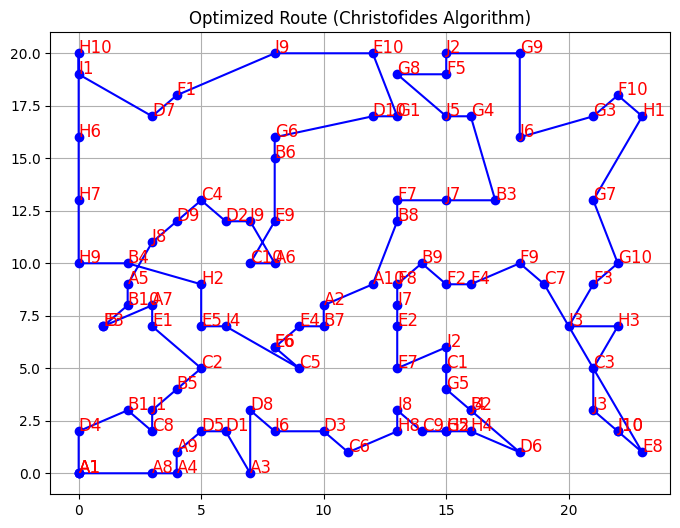

In [3]:
import math
import time
import networkx as nx
import itertools
import matplotlib.pyplot as plt

# Step 1: Cost function
def cost(route):
    total = 0
    for i in range(len(route) - 1):
        total += distances[(route[i], route[i+1])]
    return total

# Step 2: Christofides TSP algorithm
def christofides_tsp(graph):
    # Compute the mst graph to connect all nodes with the minimum total edge weight without forming cycles.
    mst = nx.minimum_spanning_tree(graph)
    # Find all vertices that have odd degrees
    odd_degree_nodes = [v for v, d in mst.degree() if d % 2 == 1]
    # Create a subgraph consisting only of these odd-degree vertices
    subgraph = graph.subgraph(odd_degree_nodes)
    # Find a Minimum Weight Perfect Matching on the subgraph
    # This pairs up all odd-degree nodes with the minimum total added costs
    matching = nx.algorithms.matching.min_weight_matching(subgraph)
    # Combine the MST and the matching edges to form an Eulerian multigraph
    eulerian_graph = nx.MultiGraph(mst)
    for u, v in matching:
        weight = graph[u][v]['weight']
 	      # Add each matched edge with its corresponding weight
        eulerian_graph.add_edge(u, v, weight=weight)
    # Check if the combined graph is Eulerian (every node has even degree)
    if not nx.is_eulerian(eulerian_graph):
        raise ValueError("Combined graph is not Eulerian")
    # Find an Eulerian circuit, i.e., a path that visits every edge exactly once and returns to the start.
    eulerian_circuit = list(nx.eulerian_circuit(eulerian_graph))
    # Create a list and set()
    tsp_tour = []
    visited = set()
    # Check everything in the circuit
    for u, v in eulerian_circuit:
        if u not in visited:
	       # Add into the list if not visit
            tsp_tour.append(u)
            visited.add(u)
    # Add the starting node to close the tour
    tsp_tour.append(tsp_tour[0])
    return tsp_tour

# Step 3: Define city coordinates
city_coords = {
    'A1': (0, 0), 'A2': (10, 8), 'A3': (7, 0), 'A4': (4, 0), 'A5': (2, 9), 'A6': (8, 10), 'A7': (3, 8), 'A8': (3, 0), 'A9': (4, 1), 'A10': (12, 9),
    'B1': (2, 3), 'B2': (16, 3), 'B3': (17, 13), 'B4': (2, 10), 'B5': (4, 4), 'B6': (8, 15), 'B7': (10, 7), 'B8': (13, 12), 'B9': (14, 10), 'B10': (2, 8),
    'C1': (15, 5), 'C2': (5, 5), 'C3': (21, 5), 'C4': (5, 13), 'C5': (9, 5), 'C6': (11, 1), 'C7': (19, 9), 'C8': (3, 2), 'C9': (14, 2), 'C10': (7, 10),
    'D1': (6, 2), 'D2': (6, 12), 'D3': (10, 2), 'D4': (0, 2), 'D5': (5, 2), 'D6': (18, 1), 'D7': (3, 17), 'D8': (7, 3), 'D9': (4, 12), 'D10': (12, 17),
    'E1': (3, 7), 'E2': (13, 7), 'E3': (1, 7), 'E4': (9, 7), 'E5': (5, 7), 'E6': (8, 6), 'E7': (13, 5), 'E8': (23, 1), 'E9': (8, 12), 'E10': (12, 20),
    'F1': (4, 18), 'F2': (15, 9), 'F3': (21, 9), 'F4': (16, 9), 'F5': (15, 19), 'F6': (8, 6), 'F7': (13, 13), 'F8': (13, 9), 'F9': (18, 10), 'F10': (22, 18),
    'G1': (13, 17), 'G2': (15, 2), 'G3': (21, 17), 'G4': (16, 17), 'G5': (15, 4), 'G6': (8, 16), 'G7': (21, 13), 'G8': (13, 19), 'G9': (18, 20), 'G10': (22, 10),
    'H1': (23, 17), 'H2': (5, 9), 'H3': (22, 7), 'H4': (16, 2), 'H5': (15, 2), 'H6': (0, 16), 'H7': (0, 13), 'H8': (13, 2), 'H9': (0, 10), 'H10': (0, 20),
    'I1': (0, 19), 'I2': (15, 6), 'I3': (20, 7), 'I4': (6, 7), 'I5': (1, 7), 'I6': (8, 2), 'I7': (13, 8), 'I8': (13, 3), 'I9': (8, 20), 'I10': (22, 2),
    'J1': (3, 3), 'J2': (15, 20), 'J3': (21, 3), 'J4': (16, 3), 'J5': (15, 17), 'J6': (18, 16), 'J7': (15, 13), 'J8': (3, 11), 'J9': (7, 12), 'J10': (22, 2)
}

# Step 4: Compute pairwise distances
# Create a new dictionary to keep the distances between cities
distances = {}
# Get a cities list of city_coords keys created
cities = list(city_coords.keys())
# Outer loop to ensure all cities are computed
for i in range(len(cities)):
    # Inner loop, ensuring that each unordered pair is computed once
    for j in range(i + 1, len(cities)):
	      # Assign variable for each pair
        u, v = cities[i], cities[j]
	      # Get the coordinated of u and v
        x1, y1 = city_coords[u]
        x2, y2 = city_coords[v]
	      # Get the distance between u and v
        d = math.hypot(x1 - x2, y1 - y2)
	      # Store them in bidirections for later usage.
        distances[(u, v)] = d
        distances[(v, u)] = d

# Step 5: Build graph
graph = nx.Graph()
for (u, v), w in distances.items():
    graph.add_edge(u, v, weight=w)

# Step 6: Christofides route and metrics
start_christofides = time.time()
christofides_route = christofides_tsp(graph)
end_christofides = time.time()
christofides_cost = cost(christofides_route)
christofides_time = end_christofides - start_christofides

# Step 7: Print metrics
print("\n--- Performance Metrics ---")
print(f"Christofides route: {christofides_route}")
print(f"Christofides cost: {christofides_cost:.2f}")
print(f"Christofides run-time: {christofides_time:.6f} seconds")

# Step 8: Plot optimized route
def plot_route(route, title):
    route = route + [route[0]]
    x = [city_coords[city][0] for city in route]
    y = [city_coords[city][1] for city in route]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'bo-')
    for i, city in enumerate(route):
        plt.text(x[i], y[i], city, fontsize=12, color='red')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_route(christofides_route, "Optimized Route (Christofides Algorithm)")


Merged Algorithm with 100 points



--- Performance Metrics ---
Merged route: ['A1', 'A8', 'A4', 'A9', 'D5', 'D1', 'D8', 'A3', 'I6', 'D3', 'C6', 'H8', 'I8', 'C9', 'G2', 'H5', 'H4', 'D6', 'B2', 'J4', 'G5', 'C1', 'I2', 'E7', 'E2', 'I7', 'F8', 'B9', 'F2', 'F4', 'F9', 'C7', 'I3', 'C3', 'J3', 'J10', 'I10', 'E8', 'H3', 'F3', 'G10', 'G7', 'H1', 'F10', 'G3', 'J6', 'B3', 'J7', 'F7', 'B8', 'A10', 'A2', 'B7', 'E4', 'C5', 'F6', 'E6', 'I4', 'E5', 'H2', 'J8', 'D9', 'C4', 'D2', 'J9', 'C10', 'A6', 'E9', 'B6', 'G6', 'D10', 'G1', 'J5', 'G4', 'G9', 'J2', 'F5', 'G8', 'E10', 'I9', 'F1', 'D7', 'H10', 'I1', 'H6', 'H7', 'H9', 'B4', 'A5', 'B10', 'I5', 'E3', 'A7', 'E1', 'C2', 'B5', 'J1', 'C8', 'B1', 'D4', 'A1']
Merged cost: 184.49
Merged run-time: 1.628870 seconds
Accuracy ratio (Christofides / Optimal): 1.053
Percentage Improvement (Baseline to Final): 5.02%



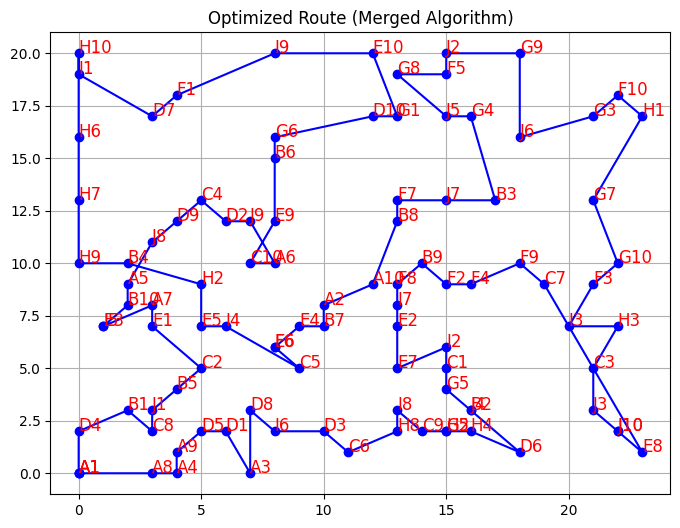

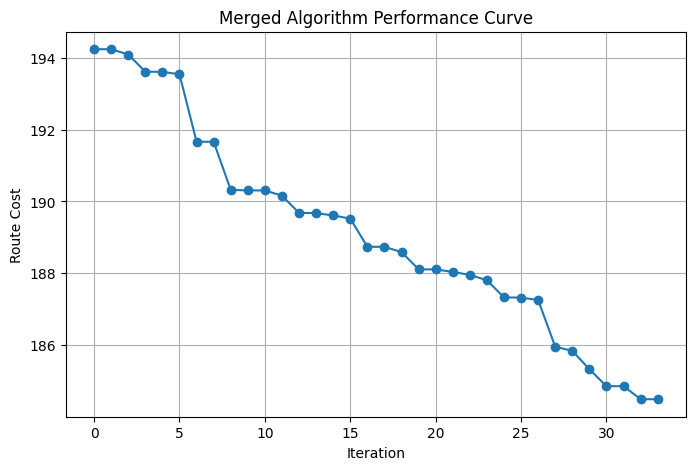

In [2]:
import math
import time
import networkx as nx
import itertools
import matplotlib.pyplot as plt

# Step 1: Cost function
def cost(route):
    total = 0
    for i in range(len(route) - 1):
        total += distances[(route[i], route[i+1])]
    return total

# Step 2: Christofides TSP algorithm
def christofides_tsp(graph):
    # Compute the mst graph to connect all nodes with the minimum total edge weight without forming cycles.
    mst = nx.minimum_spanning_tree(graph)
    # Find all vertices that have odd degrees
    odd_degree_nodes = [v for v, d in mst.degree() if d % 2 == 1]
    # Create a subgraph consisting only of these odd-degree vertices
    subgraph = graph.subgraph(odd_degree_nodes)
    # Find a Minimum Weight Perfect Matching on the subgraph
    # This pairs up all odd-degree nodes with the minimum total added costs
    matching = nx.algorithms.matching.min_weight_matching(subgraph)
    # Combine the MST and the matching edges to form an Eulerian multigraph
    eulerian_graph = nx.MultiGraph(mst)
    for u, v in matching:
        weight = graph[u][v]['weight']
 	      # Add each matched edge with its corresponding weight
        eulerian_graph.add_edge(u, v, weight=weight)
    # Check if the combined graph is Eulerian (every node has even degree)
    if not nx.is_eulerian(eulerian_graph):
        raise ValueError("Combined graph is not Eulerian")
    # Find an Eulerian circuit, i.e., a path that visits every edge exactly once and returns to the start.
    eulerian_circuit = list(nx.eulerian_circuit(eulerian_graph))
    # Create a list and set()
    tsp_tour = []
    visited = set()
    # Check everything in the circuit
    for u, v in eulerian_circuit:
        if u not in visited:
	       # Add into the list if not visit
            tsp_tour.append(u)
            visited.add(u)
    # Add the starting node to close the tour
    tsp_tour.append(tsp_tour[0])
    return tsp_tour

# Step 3: Merge with two-opt algorithm
def two_opt(route):
    best = route
    improved = True
    cost_history = [cost(best)] # Added for performance curve
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1:
                    continue
                new_route = route[:]
                new_route[i:j] = route[j - 1:i - 1:-1]
                if cost(new_route) < cost(best):
                    best = new_route
                    improved = True
                    cost_history.append(cost(best)) # Added for performance curve
        route = best
    return best, cost_history

# Step 4: Define city coordinates
city_coords = {
    'A1': (0, 0), 'A2': (10, 8), 'A3': (7, 0), 'A4': (4, 0), 'A5': (2, 9), 'A6': (8, 10), 'A7': (3, 8), 'A8': (3, 0), 'A9': (4, 1), 'A10': (12, 9),
    'B1': (2, 3), 'B2': (16, 3), 'B3': (17, 13), 'B4': (2, 10), 'B5': (4, 4), 'B6': (8, 15), 'B7': (10, 7), 'B8': (13, 12), 'B9': (14, 10), 'B10': (2, 8),
    'C1': (15, 5), 'C2': (5, 5), 'C3': (21, 5), 'C4': (5, 13), 'C5': (9, 5), 'C6': (11, 1), 'C7': (19, 9), 'C8': (3, 2), 'C9': (14, 2), 'C10': (7, 10),
    'D1': (6, 2), 'D2': (6, 12), 'D3': (10, 2), 'D4': (0, 2), 'D5': (5, 2), 'D6': (18, 1), 'D7': (3, 17), 'D8': (7, 3), 'D9': (4, 12), 'D10': (12, 17),
    'E1': (3, 7), 'E2': (13, 7), 'E3': (1, 7), 'E4': (9, 7), 'E5': (5, 7), 'E6': (8, 6), 'E7': (13, 5), 'E8': (23, 1), 'E9': (8, 12), 'E10': (12, 20),
    'F1': (4, 18), 'F2': (15, 9), 'F3': (21, 9), 'F4': (16, 9), 'F5': (15, 19), 'F6': (8, 6), 'F7': (13, 13), 'F8': (13, 9), 'F9': (18, 10), 'F10': (22, 18),
    'G1': (13, 17), 'G2': (15, 2), 'G3': (21, 17), 'G4': (16, 17), 'G5': (15, 4), 'G6': (8, 16), 'G7': (21, 13), 'G8': (13, 19), 'G9': (18, 20), 'G10': (22, 10),
    'H1': (23, 17), 'H2': (5, 9), 'H3': (22, 7), 'H4': (16, 2), 'H5': (15, 2), 'H6': (0, 16), 'H7': (0, 13), 'H8': (13, 2), 'H9': (0, 10), 'H10': (0, 20),
    'I1': (0, 19), 'I2': (15, 6), 'I3': (20, 7), 'I4': (6, 7), 'I5': (1, 7), 'I6': (8, 2), 'I7': (13, 8), 'I8': (13, 3), 'I9': (8, 20), 'I10': (22, 2),
    'J1': (3, 3), 'J2': (15, 20), 'J3': (21, 3), 'J4': (16, 3), 'J5': (15, 17), 'J6': (18, 16), 'J7': (15, 13), 'J8': (3, 11), 'J9': (7, 12), 'J10': (22, 2)
}

# Step 5: Compute pairwise distances
# Create a new dictionary to keep the distances between cities
distances = {}
# Get a cities list of city_coords keys created
cities = list(city_coords.keys())
# Outer loop to ensure all cities are computed
for i in range(len(cities)):
    # Inner loop, ensuring that each unordered pair is computed once
    for j in range(i + 1, len(cities)):
	      # Assign variable for each pair
        u, v = cities[i], cities[j]
	      # Get the coordinated of u and v
        x1, y1 = city_coords[u]
        x2, y2 = city_coords[v]
	      # Get the distance between u and v
        d = math.hypot(x1 - x2, y1 - y2)
	      # Store them in bidirections for later usage.
        distances[(u, v)] = d
        distances[(v, u)] = d

# Step 6: Build graph
graph = nx.Graph()
for (u, v), w in distances.items():
    graph.add_edge(u, v, weight=w)

# Step 7: Christofides route and metrics
start_time = time.time()
christofides_route = christofides_tsp(graph)
optimized_route, cost_history = two_opt(christofides_route)
end_time = time.time()
merged_runtime = end_time - start_time
christofides_cost = cost(christofides_route)
merged_cost = cost(optimized_route)
accuracy_ratio = christofides_cost / merged_cost

if christofides_cost > 0:
    percentage_improvement = ((christofides_cost - merged_cost) / christofides_cost) * 100
else:
    percentage_improvement = 0.0

# Step 8: Print metrics
print("\n--- Performance Metrics ---")
print(f"Merged route: {optimized_route}")
print(f"Merged cost: {merged_cost:.2f}")
print(f"Merged run-time: {merged_runtime:.6f} seconds")
print(f"Accuracy ratio (Christofides / Optimal): {accuracy_ratio:.3f}")
print(f"Percentage Improvement (Baseline to Final): {percentage_improvement:.2f}%\n")

# Step 9: Plot optimized route
def plot_route(route, title):
    route = route + [route[0]]
    x = [city_coords[city][0] for city in route]
    y = [city_coords[city][1] for city in route]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'bo-')
    for i, city in enumerate(route):
        plt.text(x[i], y[i], city, fontsize=12, color='red')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_route(christofides_route, "Optimized Route (Merged Algorithm)")

# Step 10: Plot convergence curve
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, marker='o')
plt.title("Merged Algorithm Performance Curve")
plt.xlabel("Iteration")
plt.ylabel("Route Cost")
plt.grid(True)
plt.show()